In [1]:
"""
evaluate_dqn.py

Notebook de evaluación del modelo DQN entrenado. Ejecuta un episodio sin exploración
y muestra estadísticas y visualizaciones para validar el comportamiento del agente.

Autor: Álvaro González
"""

'\nevaluate_dqn.py\n\nNotebook de evaluación del modelo DQN entrenado. Ejecuta un episodio sin exploración\ny muestra estadísticas y visualizaciones para validar el comportamiento del agente.\n\nAutor: Álvaro González\n'

In [2]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from model_dqn import DQN
from env_dqn import EVChargingEnv

In [ ]:
# Cargar datos y modelo
data = pd.read_csv('/Users/alvarogonzaleztabernero/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/ICAI/4/tfg_code/data_dqn/processed_ev_charging_patterns_dqn.csv')
model_path = '/Users/alvarogonzaleztabernero/Library/CloudStorage/OneDrive-UniversidadPontificiaComillas/ICAI/4/tfg_code/models/dqn_model.pth'

state_dim = 6
action_dim = 2

model = DQN(state_dim, action_dim)
model.load_state_dict(torch.load(model_path))
model.eval()

DQN(
  (fc1): Linear(in_features=6, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=2, bias=True)
)

In [4]:
# Simulación
env = EVChargingEnv(data)
state = env.reset()
done = False

states, actions, rewards, socs, prices = [], [], [], [], []

while not done:
    with torch.no_grad():
        action = model(torch.FloatTensor(state).unsqueeze(0)).argmax().item()

    next_state, reward, done, _ = env.step(action)

    states.append(state)
    actions.append(action)
    rewards.append(reward)
    socs.append(env.soc)
    if env.current_step < len(data):
        prices.append(data.iloc[env.current_step]['Charging Rate (kW)'])
    else:
        prices.append(np.nan)

    state = next_state

In [5]:
# Validación de SOC
socs = np.array(socs)
if np.any((socs < 0) | (socs > 1)):
    print("❌ SOC fuera de rango en algunos pasos.")
else:
    print("✅ SOC en rango válido [0,1] durante todo el episodio.")

✅ SOC en rango válido [0,1] durante todo el episodio.


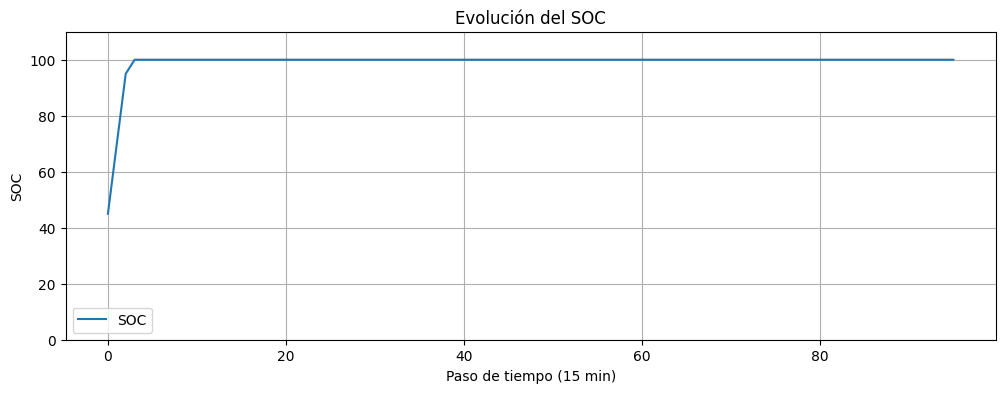

In [9]:
# Visualizaciones
plt.figure(figsize=(12, 4))
plt.plot(100*socs, label='SOC')
plt.title('Evolución del SOC')
plt.xlabel('Paso de tiempo (15 min)')
plt.ylabel('SOC')
plt.ylim(0, 110)
plt.grid(True)
plt.legend()
plt.show()

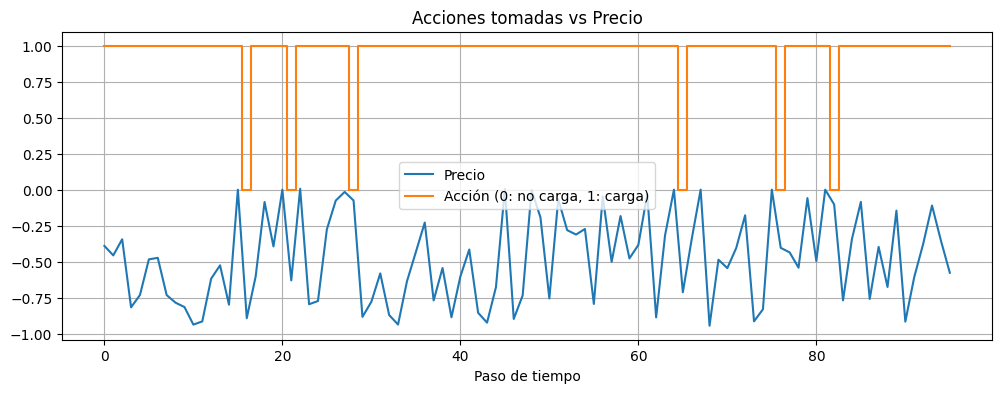

In [7]:
plt.figure(figsize=(12, 4))
plt.plot(prices, label='Precio')
plt.step(range(len(actions)), actions, label='Acción (0: no carga, 1: carga)', where='mid')
plt.title('Acciones tomadas vs Precio')
plt.xlabel('Paso de tiempo')
plt.grid(True)
plt.legend()
plt.show()

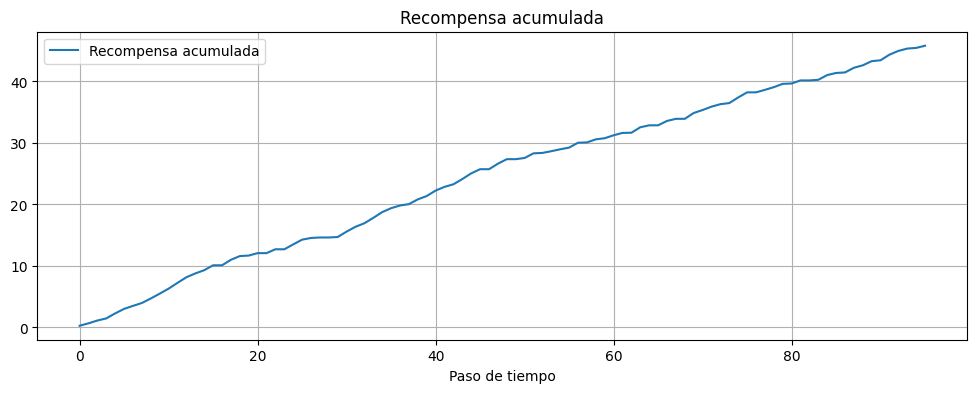

In [8]:
plt.figure(figsize=(12, 4))
plt.plot(np.cumsum(rewards), label='Recompensa acumulada')
plt.title('Recompensa acumulada')
plt.xlabel('Paso de tiempo')
plt.grid(True)
plt.legend()
plt.show()